In [1]:
import numpy as np

In [2]:
#!/usr/bin/python

""" 
    This is the code to accompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


/home/leo/anaconda2/envs/ud120/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [4]:
clf = DecisionTreeClassifier(min_samples_split=40)
clf.fit(features_train, labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [5]:
clf.score(features_test, labels_test)

0.97895335608646183

# Visualize

In [6]:
import pydot
from IPython.display import Image, display, SVG

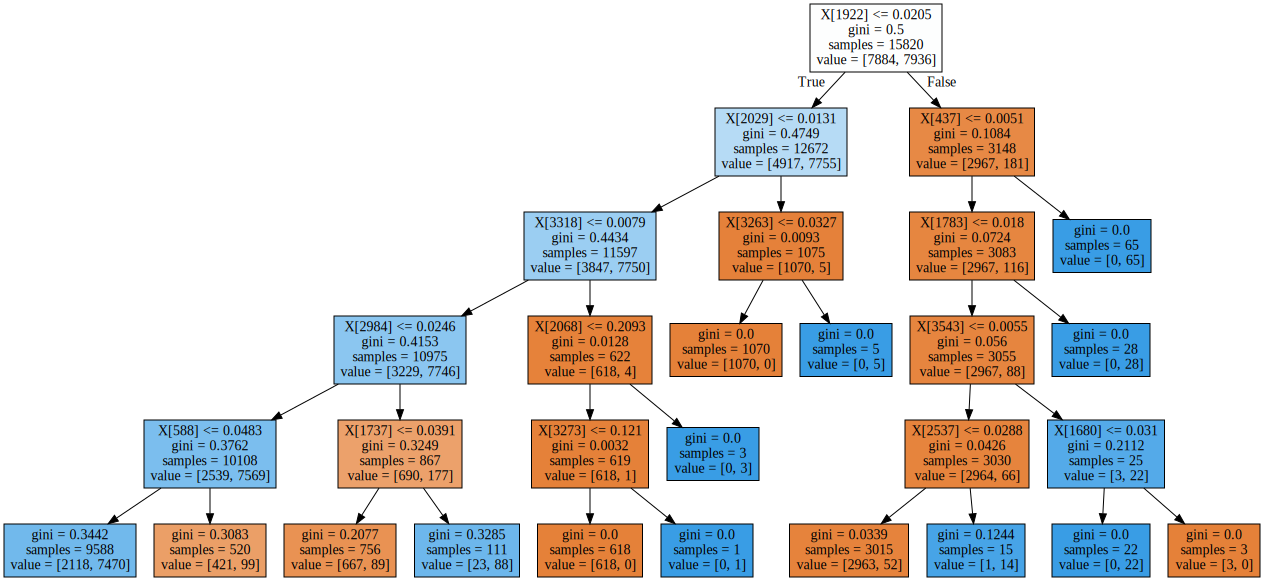

In [7]:
# Limit max depth, otherwise the tree is too large
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(features_train, labels_train)

gv_data = export_graphviz(clf, out_file=None, filled=True)
G = pydot.graph_from_dot_data(gv_data)
SVG(G.create(prog='dot', format='svg'))
# Image(G.create(prog='dot', format='png'))